<a href="https://colab.research.google.com/github/UetaKento/Aizu_NLP/blob/main/Ex5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import division  # Python 2 users only
import nltk, re, pprint
from nltk import word_tokenize
nltk.download('all')

In [ ]:
"""
(1)
"""
tagged_words = nltk.corpus.brown.tagged_words(tagset='universal') # tagged_wordsはtuple型でwordとtagがセットになっている。
dict_tagged_words = dict(tagged_words) # tagged_wordsをdict型へ。
print(dict_tagged_words)
sorted(set(dict_tagged_words.values())) # dict型のvalueがタグなので、setで重複をなくしてsort。

{'The': 'DET', 'Fulton': 'NOUN', 'County': 'NOUN', 'Grand': 'ADJ', 'Jury': 'NOUN', 'said': 'VERB', 'Friday': 'NOUN', 'an': 'DET', 'investigation': 'NOUN', 'of': 'ADP', "Atlanta's": 'NOUN', 'recent': 'ADJ', 'primary': 'ADJ', 'election': 'NOUN', 'produced': 'VERB', '``': '.', 'no': 'DET', 'evidence': 'NOUN', "''": '.', 'that': 'ADP', 'any': 'DET', 'irregularities': 'NOUN', 'took': 'VERB', 'place': 'NOUN', '.': '.', 'jury': 'NOUN', 'further': 'ADV', 'in': 'ADP', 'term-end': 'NOUN', 'presentments': 'NOUN', 'the': 'DET', 'City': 'NOUN', 'Executive': 'ADJ', 'Committee': 'NOUN', ',': '.', 'which': 'DET', 'had': 'VERB', 'over-all': 'ADJ', 'charge': 'NOUN', 'deserves': 'VERB', 'praise': 'VERB', 'and': 'CONJ', 'thanks': 'NOUN', 'Atlanta': 'NOUN', 'for': 'ADP', 'manner': 'NOUN', 'was': 'VERB', 'conducted': 'VERB', 'September-October': 'NOUN', 'term': 'NOUN', 'been': 'VERB', 'charged': 'VERB', 'by': 'ADP', 'Superior': 'ADJ', 'Court': 'NOUN', 'Judge': 'NOUN', 'Durwood': 'NOUN', 'Pye': 'NOUN', 'to':

['.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X']

In [ ]:
"""
(2)
Bigramはn番目の単語のタグをn-1番目の単語のタグを用いて考えるので、n-1番目の単語のタグが複数あり得る場合エラーが起きやすい。
「to」で考えてみる。toには前置詞の使い方と不定詞の使い方がある。
A: I walk to school. のtoは前置詞のtoであり、前置詞のtoの後には名詞が続く。
B: To walk is fun. のtoは不定詞のtoであり、不定詞のtoの後には動詞が続く。
もし、Aでトレーニングしていた場合、I go to schoolのような文字列が来たときは正しくタグが付けられるが、Bのような文字列が来たときはタグがNoneになる。
また、一度タグがNoneになるとその後ろ全てNoneになるため良くない。
"""

In [ ]:
"""
(3)
"""
from nltk.corpus import brown
from collections import defaultdict
brown_tagged_words = brown.tagged_words(categories='news') 
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
T4L = []
list_brown_tagged_sents = []
list_brown_tagged_sents_v2 = []

brown_tagged_words_fd = nltk.FreqDist(brown_tagged_words) # 単語の頻度を考えるためFreqDistを使う。
# print(brown_tagged_words_fd.most_common(1000)) 最頻出の1000単語。

tuple_1000 = [word for (word, _) in brown_tagged_words_fd.most_common(1000)] # brown_tagged_words_fd.most_common(1000)は最頻出1000単語の(('単語', 'タグ'), 出現回数)のタプルになっているので、('単語', 'タグ')にする。
# print(tuple_1000) 

mapping = defaultdict(lambda: 'UNK') # 最頻出1000単語は'単語': '単語'になるようにし、それ以外の単語は'単語': 'UNK'になるようにdefaultdictとlambdaを使ってdict型のmappingを作る。
for (v,k) in tuple_1000:
    mapping[v] = v

for i in range(len(brown_tagged_sents)): # brown_tagged_sents[i]はi行目の単語とタグのtupleのlist。[(a,b),(c,d),....]
  for j in range(len(brown_tagged_sents[i])): # brown_tagged_sents[i][j]はi行j番目の単語とタグのtuple。(a,b)
    T4L = list(brown_tagged_sents[i][j]) # brown_tagged_sents[i][j]はtupleで、値の変更が出来ないのでlistに変える。
    T4L[0] = mapping[T4L[0]] # tuple(a,b)がlist[a,b]のように変わったのでlist[0]でaの値を変える。
    list_brown_tagged_sents.append(tuple(T4L)) # list型に変えたbrown_tagged_sents[i][j]をtupleに戻して、list_brown_tagged_sentsに追加。
  list_brown_tagged_sents_v2.append(list_brown_tagged_sents) # brown_tagged_sentsを表現するために、list_brown_tagged_sentsをlist_brown_tagged_sents_v2に追加。
  list_brown_tagged_sents = [] # これをすることで行の区切りを表す。

size = int(len(list_brown_tagged_sents_v2) * 0.9) # list_brown_tagged_sents_v2の90％にあたる、行のインデックスをsizeへ。
My_train_sents =  list_brown_tagged_sents_v2[:size] # list_brown_tagged_sents_v2の0%~90％をtrain_sentsに。
My_test_sents = list_brown_tagged_sents_v2[size:] # list_brown_tagged_sents_v2の90％~100%をtrain_sentsに。

My_bigram_tagger = nltk.BigramTagger(My_train_sents)
print(My_bigram_tagger.evaluate(My_test_sents))

0.29084022725007475


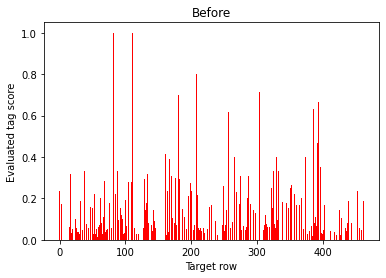

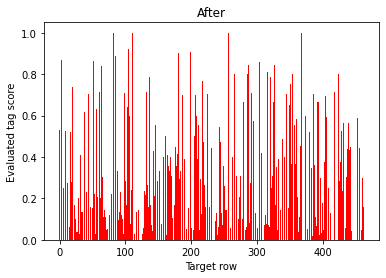

In [ ]:
"""
グラフにしてみると、全体的にタグの評価点が上がっていることがわかる。
"""
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
bigram_tagger = nltk.BigramTagger(train_sents)

# evaluate = [bigram_tagger.evaluate(test_sents[i:i+1]) for i in range(len(test_sents))]
# print(evaluate)

# My_evaluate = [My_bigram_tagger.evaluate(My_test_sents[i:i+1]) for i in range(len(My_test_sents))]
# print(evaluate)

import matplotlib.pyplot as plt
left = list(range(len(test_sents)))
height = [bigram_tagger.evaluate(test_sents[i:i+1]) for i in range(len(test_sents))]
plt.bar(left, height, color='r')
plt.title("Before")
plt.xlabel("Target row")
plt.ylabel("Evaluated tag score")
plt.show()

left = list(range(len(My_test_sents)))
height =  [My_bigram_tagger.evaluate(My_test_sents[i:i+1]) for i in range(len(My_test_sents))]
plt.bar(left, height, color='r')
plt.title("After")
plt.xlabel("Target row")
plt.ylabel("Evaluated tag score")
plt.show()